# **Importing Required Libraries**

In [ ]:
# importing libraries
import pandas as pd
from io import StringIO
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# **Reading IRIS Data Set | Data Exploration**



Shape of the dataframe

(149, 5)

Data column	data types

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Classes		row count 

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: species, dtype: int64

       sepal_length  sepal_width  petal_length  petal_width
count    149.000000   149.000000    149.000000   149.000000
mean       5.848322     3.051007      3.774497     1.205369
std        0.828594     0.433499      1.759651     0.761292
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Checking for Null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64



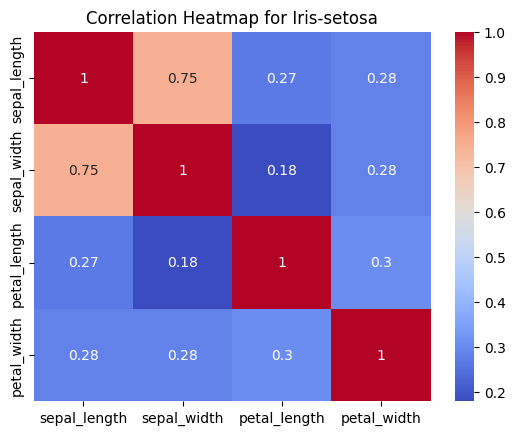

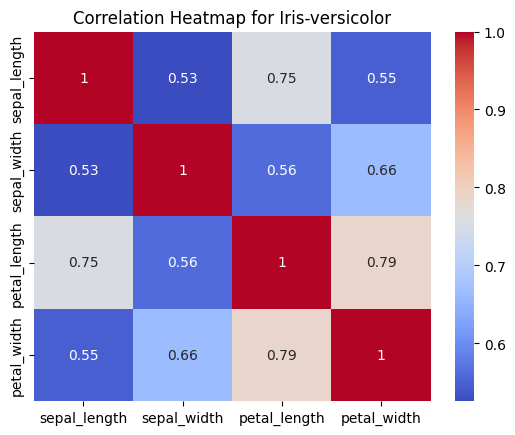

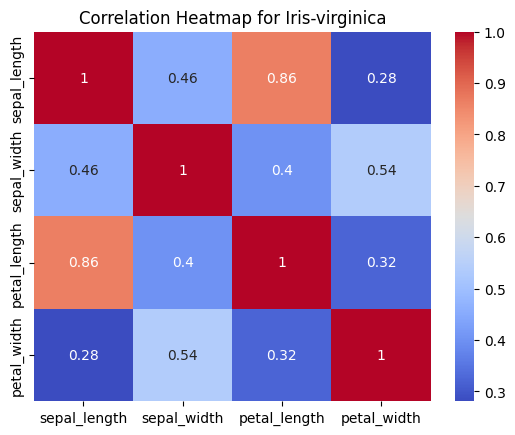

In [ ]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
# This will return a Series with unique values as indexes and counts as values.
value_counts = df['species'].value_counts()
print("Shape of the dataframe\n\n{}\n".format(df.shape))
print("Data column\tdata types\n\n{}\n".format(df.dtypes))
print("Classes\t\trow count \n\n{}\n".format(value_counts))
print("{}\n".format(df.describe()))
print("Checking for Null values\n\n{}\n".format(df.isnull().sum()))

# Grouping the DataFrame by species
grouped = df.groupby('species')

# Iterate over each species and generate a DataFrame for every class
for class_name, group_df in grouped:
    correlation_matrix = group_df.corr(numeric_only=True)
    # correlation matrix Heatmap for species
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap for {}'.format(class_name))
    plt.show()

# **Splitting Data into Training and Testing | Training Linear Regression Model**



In [ ]:

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # Defining Features
y = df['species']  # Defining Target variable

# Assuming sentosa vs other species so to make a binary classification problem
y_binary = np.where(y == 'Iris-setosa', 1, 0)

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

# **Classification of testing data | Accuracy | Cross Valuation Score**

In [ ]:
#Use the model to predict on the test set.
test_predictions = model.predict(X_test)

# Convert continuous predictions to binary class labels based on a threshold of 0.5
predicted_classes = np.where(test_predictions >= 0.5, 1, 0)

# Calculate and print the accuracy of the model on the test data
test_accuracy = accuracy_score(y_test, predicted_classes)
print("Test Accuracy:{}\n".format(test_accuracy))

# Evaluate the model's performance using 5-fold cross-validation
cv_scores = cross_val_score(model, X, y_binary, cv=5, scoring='neg_mean_absolute_error')
cv_scores = -cv_scores
print("5-fold Cross-Validation MAE Scores:{}".format(cv_scores))
print("Mean MAE:{}\n".format(cv_scores.mean())) # Calculate and print the average MAE across all folds

# Repeat the cross-validation process with 10 folds to assess model consistency across a higher number of splits
cv_scores = cross_val_score(model, X, y_binary, cv=10, scoring='neg_mean_absolute_error')
cv_scores = -cv_scores
print("10-fold Cross-Validation MAE Scores:{}".format(cv_scores))
print("Mean MAE:{}\n".format(cv_scores.mean())) # Print the average MAE for 10-fold cross-validation


Test Accuracy:1.0

5-fold Cross-Validation MAE Scores:[0.14963452 0.13597607 0.19701381 0.17582048 0.11060666]
Mean MAE:0.15381030620962843

10-fold Cross-Validation MAE Scores:[0.13839641 0.10191498 0.14273449 0.13806271 0.1696046  0.16053405
 0.18898569 0.1496282  0.13356064 0.06135203]
Mean MAE:0.13847738149920813

